In [4]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_csv("IMDB Dataset.csv")

df.dropna(inplace=True)

df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

<ipython-input-6-d6d6fb75bad1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette='coolwarm')


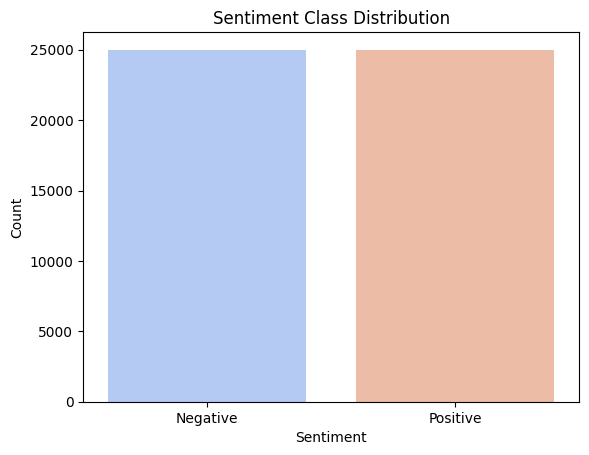

In [6]:
sns.countplot(x=df['sentiment'], palette='coolwarm')
plt.title('Sentiment Class Distribution')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [7]:
df.shape

(50000, 2)

In [8]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [10]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['review'].apply(preprocess_text)

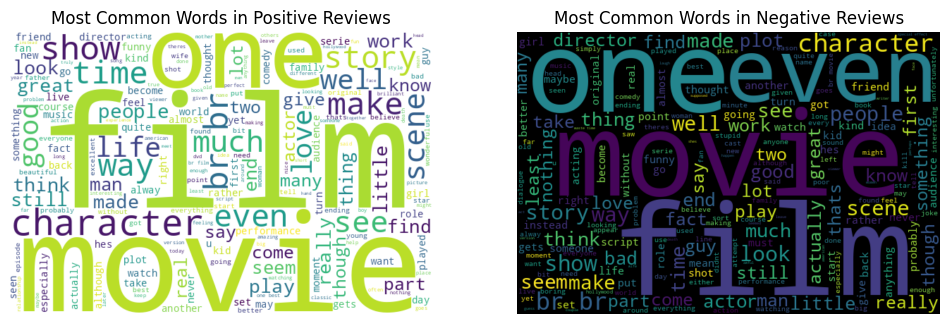

In [11]:
positive_reviews = " ".join(df[df['sentiment'] == 1]['cleaned_review'])
negative_reviews = " ".join(df[df['sentiment'] == 0]['cleaned_review'])

wordcloud_pos = WordCloud(width=600, height=400, background_color='white').generate(positive_reviews)
wordcloud_neg = WordCloud(width=600, height=400, background_color='black').generate(negative_reviews)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Positive Reviews")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Negative Reviews")

plt.show()

In [12]:
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

nb_acc = accuracy_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

print(f"Naïve Bayes - Accuracy: {nb_acc:.4f}, F1-score: {nb_f1:.4f}")

Naïve Bayes - Accuracy: 0.8572, F1-score: 0.8581


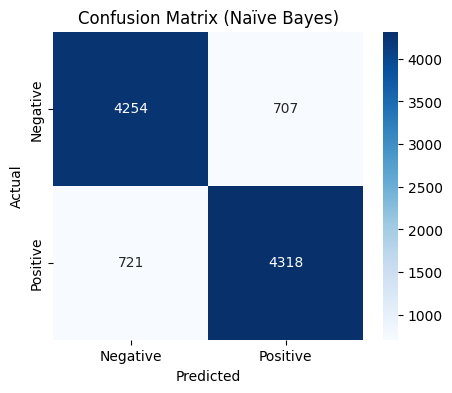

In [16]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Naïve Bayes)")
plt.show()

In [20]:
def predict_sentiment(review):
    review_tfidf = vectorizer.transform([review])
    prediction = nb_model.predict(review_tfidf)
    return "Positive" if prediction[0] == 1 else "Negative"

In [21]:
print(predict_sentiment("This movie was absolutely amazing! I loved every moment of it."))
print(predict_sentiment("Worst movie ever. Total waste of time."))
print(predict_sentiment("The storyline was interesting, but the acting was poor."))
print(predict_sentiment("Fantastic cinematography and great performances!"))
print(predict_sentiment("I didn't like the plot. It was too slow and boring."))

Positive
Negative
Positive
Positive
Negative
